Combine the cleaned datasets from the "No Wegovy Members" notebook (control group) and "BOB_GLPWLA_Analysis" (treatment group) notebook to create PSM cohorts for comparison.

Read and import member data from treatment group.

In [ ]:
import pandas as pd
glp_members = pd.read_csv('glp1_members_pdc65.csv')
glp_members.head()

Assign binary variable to treatment group.

In [2]:
glp_members['GLP-1'] = 1
glp_members

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,Diseases_of_the_circulatory_system,Diseases_of_the_digestive_system,Diseases_of_the_genitourinary_system,Diseases_of_the_musculoskeletal_system_and_connective_tissue,Diseases_of_the_nervous_system,"Mental,_Behavioral_and_Neurodevelopmental_disorders",Neoplasms,GLP-1
0,mma-b027fbc0d58348338e0a12b5520743a1,NC,Subscriber,Female,48,Generation X,743.05825,1762.82706,1853.80635,471.32,...,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1,mma-bfb67842a597473e947b613fac97ad55,PA,Subscriber,Female,54,Generation X,743.35200,1664.67627,2031.73071,757.67,...,2,0,0.00,0.00,45.80,0.00,767.07,0.00,0.00,1
2,mma-1a161f1e3c50438c9922817772f5ef00,OTHER,Subscriber,Female,39,Millenials,505.02675,4521.07984,624.54187,4908.83,...,5,0,129.43,0.00,3199.01,0.00,0.00,26.00,30.32,1
3,mma-d54971b76cc24da98e91aa4c6dc988f2,NC,Subscriber,Female,50,Generation X,813.81675,2434.56852,442.09564,1935.36,...,4,0,0.00,0.00,131.77,912.09,0.00,0.00,0.00,1
4,mma-89dd2150959c48f2a8b272b1ea570a03,PA,Subscriber,Female,47,Generation X,16542.53125,2606.69822,2676.17736,4336.96,...,7,0,0.00,1739.82,4694.96,107.00,0.00,0.00,175.64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,mma-129485d79a4348c6803a6cd4575becc5,NC,Subscriber,Female,45,Generation X,6768.59925,10115.82008,19119.30018,10681.36,...,5,0,461.15,0.00,1903.78,162.55,0.00,0.00,21290.32,1
257,mma-3889d08c09eb4436b6550eeaeba10110,NC,Subscriber,Female,39,Millenials,3208.29050,7543.59248,1756.99771,8378.28,...,10,0,1976.36,0.00,12459.03,15.63,0.00,0.00,2326.88,1
258,mma-26ab442e19584de59574806d5f5f58e3,NC,Subscriber,Female,51,Generation X,5813.00700,2670.25552,1443.83416,10602.83,...,0,0,0.00,213.93,9223.50,0.00,0.00,113.72,0.00,1
259,mma-5bec529f37d0492f865267a9bb9da698,NC,Subscriber,Female,58,Generation X,73498.42375,6870.35424,10776.05450,14343.07,...,3,0,817.28,267.19,118.32,59699.12,8403.11,204.49,5445.65,1


Import and read member data from controlled group

In [3]:
noglp_members = pd.read_csv('no-glp1-members-nofilter.csv')
noglp_members.columns= noglp_members.columns.str.replace(' ', '_')

Assign binary variable to control group, drop any duplicates if there are any.

In [4]:
noglp_members['GLP-1'] = 0
noglp_members.drop_duplicates(subset='MEMBER_ID', keep='first', inplace=True)
noglp_members

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,Diseases_of_the_circulatory_system,Diseases_of_the_digestive_system,Diseases_of_the_genitourinary_system,Diseases_of_the_musculoskeletal_system_and_connective_tissue,Diseases_of_the_nervous_system,"Mental,_Behavioral_and_Neurodevelopmental_disorders",Neoplasms,GLP-1
0,mma-036ffc20ff794595a44950a4729f66d3,LA,Subscriber,Female,62,Baby Boomers,1548.18000,6302.57197,599.78383,1894.85,...,6,0,897.20,0.00,0.00,4493.81,0.00,0.0,0.00,0
1,mma-4c45de73f32445699b80d8d493793dff,MA,Subscriber,Male,57,Generation X,3612.19675,24394.26353,6790.70491,19444.98,...,2,0,4326.72,0.00,4601.44,36650.69,0.00,0.0,330.51,0
2,mma-f8d8a13411e045629b92e106d35b3cd8,NJ,Spouse,Male,42,Millenials,1302.25250,1166.67299,767.90546,389.53,...,4,0,0.00,0.00,0.00,1048.98,0.00,0.0,0.00,0
3,mma-ca2e959e4c094ddab3a345d0d94d2f3e,GA,Subscriber,Female,65,Baby Boomers,3928.96500,241.56242,525.98007,861.81,...,1,0,122.01,0.00,447.47,172.32,0.00,0.0,0.00,0
4,mma-ed99a4f01306482caec74ec3d315501c,IL,Spouse,Female,38,Millenials,24820.37100,288.47642,12854.42568,1513.65,...,4,0,514.00,0.00,0.00,1194.08,277.35,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17879,mma-38955c494c7c4c888d0f65459d8959e3,CO,Subscriber,Female,47,Generation X,1037.06675,660.83954,651.71585,982.45,...,5,0,0.00,79.30,5.45,0.00,0.00,0.0,0.00,0
17880,mma-46d15af9af544cd6b09133c45ec04642,WI,Subscriber,Male,47,Generation X,502.23025,2096.11752,1696.08609,73865.80,...,4,0,0.00,0.00,0.00,64764.14,0.00,0.0,0.00,0
17881,mma-c0b85487143b49dcbd14a6c3794ba398,DE,Dependent,Female,23,Generation Z,6949.24375,2078.81519,485.71084,0.00,...,3,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
17882,mma-565511f8a56541379d9fd2f16e419df3,IL,Subscriber,Female,64,Baby Boomers,1326.51625,8985.78469,765.83160,1809.56,...,0,0,828.98,123.19,0.00,1383.23,1404.86,0.0,563.15,0


Combine treatment and control group into one dataframe.

In [5]:
comb_members = pd.concat([glp_members,noglp_members], ignore_index=True)
comb_members

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,Diseases_of_the_circulatory_system,Diseases_of_the_digestive_system,Diseases_of_the_genitourinary_system,Diseases_of_the_musculoskeletal_system_and_connective_tissue,Diseases_of_the_nervous_system,"Mental,_Behavioral_and_Neurodevelopmental_disorders",Neoplasms,GLP-1
0,mma-b027fbc0d58348338e0a12b5520743a1,NC,Subscriber,Female,48,Generation X,743.05825,1762.82706,1853.80635,471.32,...,1,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1
1,mma-bfb67842a597473e947b613fac97ad55,PA,Subscriber,Female,54,Generation X,743.35200,1664.67627,2031.73071,757.67,...,2,0,0.00,0.00,45.80,0.00,767.07,0.0,0.00,1
2,mma-1a161f1e3c50438c9922817772f5ef00,OTHER,Subscriber,Female,39,Millenials,505.02675,4521.07984,624.54187,4908.83,...,5,0,129.43,0.00,3199.01,0.00,0.00,26.0,30.32,1
3,mma-d54971b76cc24da98e91aa4c6dc988f2,NC,Subscriber,Female,50,Generation X,813.81675,2434.56852,442.09564,1935.36,...,4,0,0.00,0.00,131.77,912.09,0.00,0.0,0.00,1
4,mma-89dd2150959c48f2a8b272b1ea570a03,PA,Subscriber,Female,47,Generation X,16542.53125,2606.69822,2676.17736,4336.96,...,7,0,0.00,1739.82,4694.96,107.00,0.00,0.0,175.64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18140,mma-38955c494c7c4c888d0f65459d8959e3,CO,Subscriber,Female,47,Generation X,1037.06675,660.83954,651.71585,982.45,...,5,0,0.00,79.30,5.45,0.00,0.00,0.0,0.00,0
18141,mma-46d15af9af544cd6b09133c45ec04642,WI,Subscriber,Male,47,Generation X,502.23025,2096.11752,1696.08609,73865.80,...,4,0,0.00,0.00,0.00,64764.14,0.00,0.0,0.00,0
18142,mma-c0b85487143b49dcbd14a6c3794ba398,DE,Dependent,Female,23,Generation Z,6949.24375,2078.81519,485.71084,0.00,...,3,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0
18143,mma-565511f8a56541379d9fd2f16e419df3,IL,Subscriber,Female,64,Baby Boomers,1326.51625,8985.78469,765.83160,1809.56,...,0,0,828.98,123.19,0.00,1383.23,1404.86,0.0,563.15,0


Export combined member level dataset to csv.

In [6]:
comb_members.to_csv('combined_members_for_study_nofilter.csv', index=False)

In [7]:
comb_members.columns

Index(['MEMBER_ID', 'HOME_STATE', 'MEMBER_RELATIONSHIP', 'GENDER', 'Age',
       'GENERATIONS', 'Med_2021', 'Med_2022', 'Med_2023', 'Med_2024',
       'Med_Delta', 'Med_%_Change', 'Med_Slope', 'Rx_2021', 'Rx_2022',
       'Rx_2023', 'Rx_2024', 'Rx_Delta', 'Rx_%_Change', 'Rx_Slope',
       'DX_IS_CHRONIC', 'ER_VISIT_FLAG', 'IS_PCP_VISIT',
       'IS_URGENT_CARE_VISIT', 'IS_PREVENTIVE_VISIT', 'IP_ADMIT_INC',
       'Diseases_of_the_circulatory_system',
       'Diseases_of_the_digestive_system',
       'Diseases_of_the_genitourinary_system',
       'Diseases_of_the_musculoskeletal_system_and_connective_tissue',
       'Diseases_of_the_nervous_system',
       'Mental,_Behavioral_and_Neurodevelopmental_disorders', 'Neoplasms',
       'GLP-1'],
      dtype='object')

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

Rewvieing counts by state. Initially ran this in case we wanted to use location as a covariate, but determined later not to use as it was harder to match pairs.

In [9]:
comb_members['HOME_STATE'].value_counts()

HOME_STATE
NC       3054
PA       1523
TX       1240
FL       1119
VA       1038
NJ        814
SD        793
OH        771
MN        752
GA        587
CA        583
MI        523
AZ        516
NY        481
SC        319
WI        303
MD        297
IL        293
KY        284
MA        275
MS        247
IN        222
TN        187
IA        173
MO        160
NH        126
UT        125
AR        107
CO        105
NE         96
DE         94
AL         85
CT         82
NV         74
KS         73
OK         72
WA         58
WV         58
ND         48
OTHER      45
ID         42
LA         39
NM         37
OR         35
WY         23
ME         19
RI         17
VT         16
MT         14
DC         10
AK          5
HI          4
Name: count, dtype: int64

In [10]:
# Define the states to keep
states_to_keep = ['NC', 'PA', 'TX', 'FL', 'VA', 'NJ', 'SD']
comb_members['HOME_STATE'] = comb_members['HOME_STATE'].apply(lambda x: x if x in states_to_keep else 'OTHER')

Get dummy columns for categorical variables so that they can be used in regression analysis for PSM.

In [11]:
comb_members_encoded = pd.get_dummies(comb_members, columns=['GENDER', 'MEMBER_RELATIONSHIP','HOME_STATE', 'GENERATIONS'], drop_first=True)
comb_members_encoded

,MEMBER_ID,Age,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,...,HOME_STATE_NC,HOME_STATE_NJ,HOME_STATE_NY,HOME_STATE_OTHER,HOME_STATE_PA,HOME_STATE_TX,GENERATIONS_Generation X,GENERATIONS_Generation Z,GENERATIONS_Millenials,GENERATIONS_Unknown
0,mma-b027fbc0d58348338e0a12b5520743a1,48,743.05825,1762.82706,1853.80635,471.32,-271.73825,-36.570249,-72.423546,0.0000,...,True,False,False,False,False,False,True,False,False,False
1,mma-bfb67842a597473e947b613fac97ad55,54,743.35200,1664.67627,2031.73071,757.67,14.31800,1.926140,41.000844,291.9859,...,False,False,False,False,True,False,True,False,False,False
2,mma-1a161f1e3c50438c9922817772f5ef00,39,505.02675,4521.07984,624.54187,4908.83,4403.80325,871.994058,931.487178,294.2915,...,False,False,False,True,False,False,False,False,True,False
3,mma-d54971b76cc24da98e91aa4c6dc988f2,50,813.81675,2434.56852,442.09564,1935.36,1121.54325,137.812751,137.215687,358.4553,...,True,False,False,False,False,False,True,False,False,False
4,mma-89dd2150959c48f2a8b272b1ea570a03,47,16542.53125,2606.69822,2676.17736,4336.96,-12205.57125,-73.782972,-3654.723461,895.3588,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18140,mma-38955c494c7c4c888d0f65459d8959e3,47,1037.06675,660.83954,651.71585,982.45,-54.61675,-5.266464,-17.297394,178.1600,...,False,False,False,True,False,False,True,False,False,False
18141,mma-46d15af9af544cd6b09133c45ec04642,47,502.23025,2096.11752,1696.08609,73865.80,73363.56975,14607.556942,21969.067782,52.4000,...,False,False,False,True,False,False,True,False,False,False
18142,mma-c0b85487143b49dcbd14a6c3794ba398,23,6949.24375,2078.81519,485.71084,0.00,-6949.24375,-100.000000,-2244.083560,0.0000,...,False,False,False,True,False,False,False,True,False,False
18143,mma-565511f8a56541379d9fd2f16e419df3,64,1326.51625,8985.78469,765.83160,1809.56,483.04375,36.414462,-677.082184,244.5246,...,False,False,False,True,False,False,False,False,False,False


In [12]:
comb_members_encoded.columns

Index(['MEMBER_ID', 'Age', 'Med_2021', 'Med_2022', 'Med_2023', 'Med_2024',
       'Med_Delta', 'Med_%_Change', 'Med_Slope', 'Rx_2021', 'Rx_2022',
       'Rx_2023', 'Rx_2024', 'Rx_Delta', 'Rx_%_Change', 'Rx_Slope',
       'DX_IS_CHRONIC', 'ER_VISIT_FLAG', 'IS_PCP_VISIT',
       'IS_URGENT_CARE_VISIT', 'IS_PREVENTIVE_VISIT', 'IP_ADMIT_INC',
       'Diseases_of_the_circulatory_system',
       'Diseases_of_the_digestive_system',
       'Diseases_of_the_genitourinary_system',
       'Diseases_of_the_musculoskeletal_system_and_connective_tissue',
       'Diseases_of_the_nervous_system',
       'Mental,_Behavioral_and_Neurodevelopmental_disorders', 'Neoplasms',
       'GLP-1', 'GENDER_Male', 'GENDER_Unknown', 'MEMBER_RELATIONSHIP_Spouse',
       'MEMBER_RELATIONSHIP_Subscriber', 'MEMBER_RELATIONSHIP_Unknown',
       'HOME_STATE_MI', 'HOME_STATE_NC', 'HOME_STATE_NJ', 'HOME_STATE_NY',
       'HOME_STATE_OTHER', 'HOME_STATE_PA', 'HOME_STATE_TX',
       'GENERATIONS_Generation X', 'GENERATIONS_Ge

Begin propensity score matching, comments included in code. Design regression analysis based on Age, Male, (T/F), Subscriber (T/F), and Spouse (T/F)

In [13]:
# Define the independent variables (covariates)
x = comb_members_encoded[['Age','GENDER_Male', 'MEMBER_RELATIONSHIP_Spouse',
       'MEMBER_RELATIONSHIP_Subscriber',
                         ]]
y = comb_members_encoded['GLP-1']

# Fit the logistic regression model
logit = LogisticRegression()
logit.fit(x, y)

# Predict propensity scores
comb_members_encoded['propensity_score'] = logit.predict_proba(x)[:, 1]
comb_members_encoded

,MEMBER_ID,Age,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,...,HOME_STATE_NJ,HOME_STATE_NY,HOME_STATE_OTHER,HOME_STATE_PA,HOME_STATE_TX,GENERATIONS_Generation X,GENERATIONS_Generation Z,GENERATIONS_Millenials,GENERATIONS_Unknown,propensity_score
0,mma-b027fbc0d58348338e0a12b5520743a1,48,743.05825,1762.82706,1853.80635,471.32,-271.73825,-36.570249,-72.423546,0.0000,...,False,False,False,False,False,True,False,False,False,0.027266
1,mma-bfb67842a597473e947b613fac97ad55,54,743.35200,1664.67627,2031.73071,757.67,14.31800,1.926140,41.000844,291.9859,...,False,False,False,True,False,True,False,False,False,0.027724
2,mma-1a161f1e3c50438c9922817772f5ef00,39,505.02675,4521.07984,624.54187,4908.83,4403.80325,871.994058,931.487178,294.2915,...,False,False,True,False,False,False,False,True,False,0.026593
3,mma-d54971b76cc24da98e91aa4c6dc988f2,50,813.81675,2434.56852,442.09564,1935.36,1121.54325,137.812751,137.215687,358.4553,...,False,False,False,False,False,True,False,False,False,0.027418
4,mma-89dd2150959c48f2a8b272b1ea570a03,47,16542.53125,2606.69822,2676.17736,4336.96,-12205.57125,-73.782972,-3654.723461,895.3588,...,False,False,False,True,False,True,False,False,False,0.027190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18140,mma-38955c494c7c4c888d0f65459d8959e3,47,1037.06675,660.83954,651.71585,982.45,-54.61675,-5.266464,-17.297394,178.1600,...,False,False,True,False,False,True,False,False,False,0.027190
18141,mma-46d15af9af544cd6b09133c45ec04642,47,502.23025,2096.11752,1696.08609,73865.80,73363.56975,14607.556942,21969.067782,52.4000,...,False,False,True,False,False,True,False,False,False,0.006412
18142,mma-c0b85487143b49dcbd14a6c3794ba398,23,6949.24375,2078.81519,485.71084,0.00,-6949.24375,-100.000000,-2244.083560,0.0000,...,False,False,True,False,False,False,True,False,False,0.004189
18143,mma-565511f8a56541379d9fd2f16e419df3,64,1326.51625,8985.78469,765.83160,1809.56,483.04375,36.414462,-677.082184,244.5246,...,False,False,True,False,False,False,False,False,False,0.028503


Check that count of unique members matches the above count of rows.

In [14]:
comb_members_encoded['MEMBER_ID'].nunique()

18145

Review box plot for range of propensity scores for treatment group.

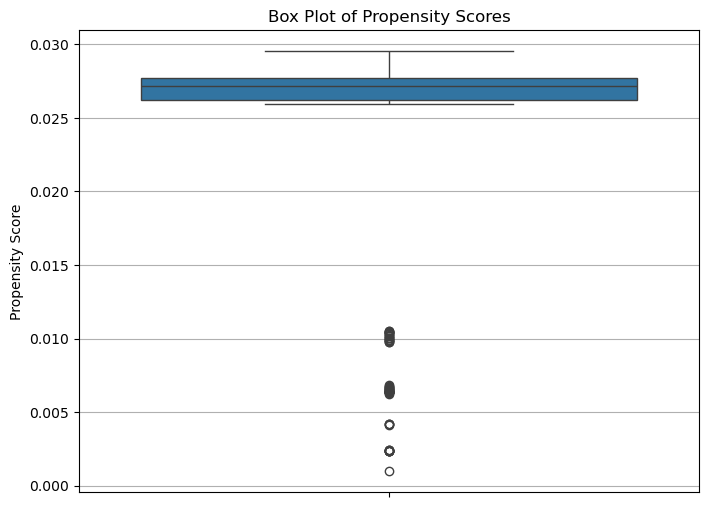

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_data = comb_members_encoded[comb_members_encoded['GLP-1'] == 1]

# Create a box plot for propensity scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_data['propensity_score'])
plt.title('Box Plot of Propensity Scores')
plt.ylabel('Propensity Score')
plt.grid(axis='y')
plt.show()

Review box plot for range of propensity scores for control group.

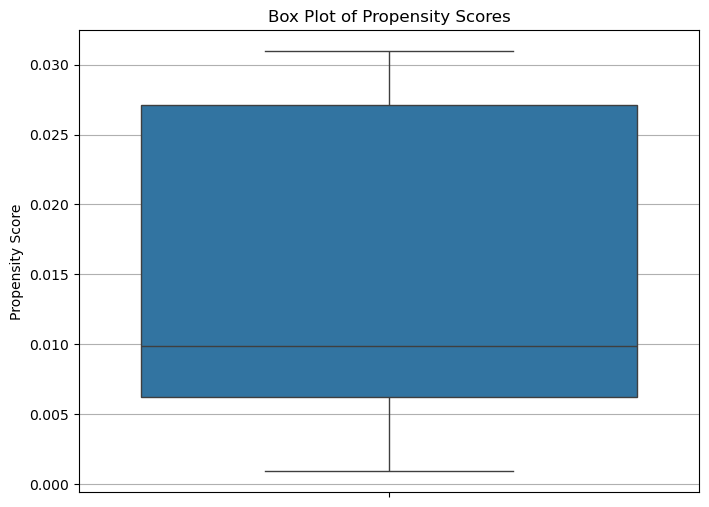

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

filtered_data0 = comb_members_encoded[comb_members_encoded['GLP-1'] == 0]

# Create a box plot for propensity scores
plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_data0['propensity_score'])
plt.title('Box Plot of Propensity Scores')
plt.ylabel('Propensity Score')
plt.grid(axis='y')
plt.show()

Run Propensity Score Matching technique.

In [17]:
# Separate treated and control groups
treated = comb_members_encoded[comb_members_encoded['GLP-1'] == 1]
control = comb_members_encoded[comb_members_encoded['GLP-1'] == 0]

matched_pairs = []
# Perform matching
for index, treated_row in treated.iterrows():
    # Calculate the distance to all control units
    control['distance'] = (control['propensity_score'] - treated_row['propensity_score']).abs()
    
    # Find the closest control unit
    closest_control_index = control['distance'].idxmin()
    closest_control = control.loc[closest_control_index]
    
    # Append the matched pair
    matched_pairs.append((treated_row, closest_control))
    
    # remove the matched control from the control DataFrame
    control = control.drop(closest_control_index)  # Uncomment this line if you want to prevent re-matching

# Create a DataFrame from the matched pairs
matched_rows = []

for treated_row, control_row in matched_pairs:
    matched_rows.append(treated_row)  # Append treated row
    matched_rows.append(control_row)   # Append the matched control row

# Create a DataFrame from the list of matched rows
matched_df1 = pd.DataFrame(matched_rows).reset_index(drop=True)
matched_df1

C:\Users\U1229773\AppData\Local\Temp\ipykernel_12676\3578231741.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control['distance'] = (control['propensity_score'] - treated_row['propensity_score']).abs()


,MEMBER_ID,Age,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,...,HOME_STATE_NY,HOME_STATE_OTHER,HOME_STATE_PA,HOME_STATE_TX,GENERATIONS_Generation X,GENERATIONS_Generation Z,GENERATIONS_Millenials,GENERATIONS_Unknown,propensity_score,distance
0,mma-b027fbc0d58348338e0a12b5520743a1,48,743.05825,1762.82706,1853.80635,471.32,-271.73825,-36.570249,-72.423546,0.0000,...,False,False,False,False,True,False,False,False,0.027266,NaN
1,mma-241a3a04192744159edd537e87d88caa,48,660.85525,1272.03960,70.37227,2213.60,1552.74475,234.959887,345.656692,122.7077,...,True,False,False,False,True,False,False,False,0.027266,0.0
2,mma-bfb67842a597473e947b613fac97ad55,54,743.35200,1664.67627,2031.73071,757.67,14.31800,1.926140,41.000844,291.9859,...,False,False,True,False,True,False,False,False,0.027724,NaN
3,mma-4ff3fdba7a874c688bcc92a6aa50c831,54,34.07500,32.39300,6900.92950,0.00,-34.07500,-100.000000,676.631150,32.7500,...,False,False,False,False,True,False,False,False,0.027724,0.0
4,mma-1a161f1e3c50438c9922817772f5ef00,39,505.02675,4521.07984,624.54187,4908.83,4403.80325,871.994058,931.487178,294.2915,...,False,True,False,False,False,False,True,False,0.026593,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,mma-1bfe37a722f64d55b1044ad5ea21b550,51,3037.37500,620.24776,2083.57721,8860.93,5823.55500,191.729865,1893.399445,108.3239,...,False,True,False,False,True,False,False,False,0.027494,0.0
518,mma-5bec529f37d0492f865267a9bb9da698,58,73498.42375,6870.35424,10776.05450,14343.07,-59155.35375,-80.485201,-17356.036099,5843.2419,...,False,False,False,False,True,False,False,False,0.028033,NaN
519,mma-c0e3ffc9aa964a5c8fc37fa1078b4a18,58,11643.43925,2474.76935,3996.06097,5035.01,-6608.42925,-56.756677,-1830.399613,22.2831,...,False,False,False,True,True,False,False,False,0.028033,0.0
520,mma-657f1e78268e4bc093258cea587d4a6f,48,6048.37125,15953.84292,6871.47855,1314.96,-4733.41125,-78.259271,-2328.259812,4771.8846,...,False,False,False,False,True,False,False,False,0.027266,NaN


Check to make sure each member is only counted once to ensure no members were matched more than once. There should be 522 members (261 *2)

In [18]:
matched_df1['MEMBER_ID'].value_counts()

MEMBER_ID
mma-b027fbc0d58348338e0a12b5520743a1    1
mma-b39af97367f14e03908dbdb703705618    1
mma-8fcaf4b3f2984384b9b9326ee4587850    1
mma-aca2041ccc884858bcf3b032f44a4b97    1
mma-d4eb6b520dae4dd7a272604cdc3e8368    1
                                       ..
mma-2e57ea51ba10440ba278c2fdf76e59f0    1
mma-e83cc4ae647240e8989cc1928f7eff73    1
mma-8285b797771a422d962e01ebc3086db5    1
mma-ecba1ab643eb46fd85eea2f093dee4d2    1
mma-b345fbf324b9458790f45108abc0be6b    1
Name: count, Length: 522, dtype: int64

Locate PSM cohort members to original member aggegrate claims dataset and use only those members info for study.

In [19]:
matched_members = matched_df1['MEMBER_ID']
matched_members_study = comb_members[comb_members['MEMBER_ID'].isin(matched_members)]
matched_members_study

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,Diseases_of_the_circulatory_system,Diseases_of_the_digestive_system,Diseases_of_the_genitourinary_system,Diseases_of_the_musculoskeletal_system_and_connective_tissue,Diseases_of_the_nervous_system,"Mental,_Behavioral_and_Neurodevelopmental_disorders",Neoplasms,GLP-1
0,mma-b027fbc0d58348338e0a12b5520743a1,NC,Subscriber,Female,48,Generation X,743.05825,1762.82706,1853.80635,471.32,...,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1,mma-bfb67842a597473e947b613fac97ad55,PA,Subscriber,Female,54,Generation X,743.35200,1664.67627,2031.73071,757.67,...,2,0,0.00,0.00,45.80,0.00,767.07,0.00,0.00,1
2,mma-1a161f1e3c50438c9922817772f5ef00,OTHER,Subscriber,Female,39,Millenials,505.02675,4521.07984,624.54187,4908.83,...,5,0,129.43,0.00,3199.01,0.00,0.00,26.00,30.32,1
3,mma-d54971b76cc24da98e91aa4c6dc988f2,NC,Subscriber,Female,50,Generation X,813.81675,2434.56852,442.09564,1935.36,...,4,0,0.00,0.00,131.77,912.09,0.00,0.00,0.00,1
4,mma-89dd2150959c48f2a8b272b1ea570a03,PA,Subscriber,Female,47,Generation X,16542.53125,2606.69822,2676.17736,4336.96,...,7,0,0.00,1739.82,4694.96,107.00,0.00,0.00,175.64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,mma-a9532facc59f46cea6136cbd96973f0e,OTHER,Subscriber,Male,67,Baby Boomers,4365.27775,1874.14728,6871.91684,5671.98,...,3,0,19.82,197.18,0.00,1837.33,0.00,3861.04,59.59,0
1547,mma-0b57ccda483b499ab5e8617f0b032cfc,TX,Subscriber,Female,66,Baby Boomers,428.55775,6993.91678,4757.93727,2548.48,...,3,0,0.00,0.00,0.00,4711.95,1684.97,0.00,0.00,0
1790,mma-4a037934af894450b235f6dcaeb2000a,OTHER,Subscriber,Female,30,Millenials,123.90375,2360.86886,209.20330,432.63,...,0,0,780.70,5.45,1313.73,0.00,0.00,0.00,0.00,0
3300,mma-fad37e4ec5734b2f9b20294eb5838eab,OTHER,Subscriber,Female,69,Baby Boomers,1999.93225,978.31328,1626.03452,922.90,...,4,0,303.60,0.00,0.00,0.00,0.00,0.00,0.00,0


Create a column that calculates the difference betwwen medical and pharmcy differences for each member from 2021 - 2024.

In [20]:
matched_members_study['MedRx_2021-2024_Diff'] = matched_members_study['Rx_Delta'] + matched_members_study['Med_Delta']
matched_members_study

C:\Users\U1229773\AppData\Local\Temp\ipykernel_12676\737944235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matched_members_study['MedRx_2021-2024_Diff'] = matched_members_study['Rx_Delta'] + matched_members_study['Med_Delta']


,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,IP_ADMIT_INC,Diseases_of_the_circulatory_system,Diseases_of_the_digestive_system,Diseases_of_the_genitourinary_system,Diseases_of_the_musculoskeletal_system_and_connective_tissue,Diseases_of_the_nervous_system,"Mental,_Behavioral_and_Neurodevelopmental_disorders",Neoplasms,GLP-1,MedRx_2021-2024_Diff
0,mma-b027fbc0d58348338e0a12b5520743a1,NC,Subscriber,Female,48,Generation X,743.05825,1762.82706,1853.80635,471.32,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,11907.38175
1,mma-bfb67842a597473e947b613fac97ad55,PA,Subscriber,Female,54,Generation X,743.35200,1664.67627,2031.73071,757.67,...,0,0.00,0.00,45.80,0.00,767.07,0.00,0.00,1,15447.65210
2,mma-1a161f1e3c50438c9922817772f5ef00,OTHER,Subscriber,Female,39,Millenials,505.02675,4521.07984,624.54187,4908.83,...,0,129.43,0.00,3199.01,0.00,0.00,26.00,30.32,1,21648.09175
3,mma-d54971b76cc24da98e91aa4c6dc988f2,NC,Subscriber,Female,50,Generation X,813.81675,2434.56852,442.09564,1935.36,...,0,0.00,0.00,131.77,912.09,0.00,0.00,0.00,1,11847.68795
4,mma-89dd2150959c48f2a8b272b1ea570a03,PA,Subscriber,Female,47,Generation X,16542.53125,2606.69822,2676.17736,4336.96,...,0,0.00,1739.82,4694.96,107.00,0.00,0.00,175.64,1,1732.88995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,mma-a9532facc59f46cea6136cbd96973f0e,OTHER,Subscriber,Male,67,Baby Boomers,4365.27775,1874.14728,6871.91684,5671.98,...,0,19.82,197.18,0.00,1837.33,0.00,3861.04,59.59,0,1522.98895
1547,mma-0b57ccda483b499ab5e8617f0b032cfc,TX,Subscriber,Female,66,Baby Boomers,428.55775,6993.91678,4757.93727,2548.48,...,0,0.00,0.00,0.00,4711.95,1684.97,0.00,0.00,0,-2609.33665
1790,mma-4a037934af894450b235f6dcaeb2000a,OTHER,Subscriber,Female,30,Millenials,123.90375,2360.86886,209.20330,432.63,...,0,780.70,5.45,1313.73,0.00,0.00,0.00,0.00,0,311.41625
3300,mma-fad37e4ec5734b2f9b20294eb5838eab,OTHER,Subscriber,Female,69,Baby Boomers,1999.93225,978.31328,1626.03452,922.90,...,0,303.60,0.00,0.00,0.00,0.00,0.00,0.00,0,-973.88685


Split into treatment and control groups.

In [21]:
treatment = matched_members_study[matched_members_study['GLP-1'] == 1]
controlled = matched_members_study[matched_members_study['GLP-1'] == 0]

In [22]:
treatment

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,...,IP_ADMIT_INC,Diseases_of_the_circulatory_system,Diseases_of_the_digestive_system,Diseases_of_the_genitourinary_system,Diseases_of_the_musculoskeletal_system_and_connective_tissue,Diseases_of_the_nervous_system,"Mental,_Behavioral_and_Neurodevelopmental_disorders",Neoplasms,GLP-1,MedRx_2021-2024_Diff
0,mma-b027fbc0d58348338e0a12b5520743a1,NC,Subscriber,Female,48,Generation X,743.05825,1762.82706,1853.80635,471.32,...,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,11907.38175
1,mma-bfb67842a597473e947b613fac97ad55,PA,Subscriber,Female,54,Generation X,743.35200,1664.67627,2031.73071,757.67,...,0,0.00,0.00,45.80,0.00,767.07,0.00,0.00,1,15447.65210
2,mma-1a161f1e3c50438c9922817772f5ef00,OTHER,Subscriber,Female,39,Millenials,505.02675,4521.07984,624.54187,4908.83,...,0,129.43,0.00,3199.01,0.00,0.00,26.00,30.32,1,21648.09175
3,mma-d54971b76cc24da98e91aa4c6dc988f2,NC,Subscriber,Female,50,Generation X,813.81675,2434.56852,442.09564,1935.36,...,0,0.00,0.00,131.77,912.09,0.00,0.00,0.00,1,11847.68795
4,mma-89dd2150959c48f2a8b272b1ea570a03,PA,Subscriber,Female,47,Generation X,16542.53125,2606.69822,2676.17736,4336.96,...,0,0.00,1739.82,4694.96,107.00,0.00,0.00,175.64,1,1732.88995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,mma-129485d79a4348c6803a6cd4575becc5,NC,Subscriber,Female,45,Generation X,6768.59925,10115.82008,19119.30018,10681.36,...,0,461.15,0.00,1903.78,162.55,0.00,0.00,21290.32,1,18502.34275
257,mma-3889d08c09eb4436b6550eeaeba10110,NC,Subscriber,Female,39,Millenials,3208.29050,7543.59248,1756.99771,8378.28,...,0,1976.36,0.00,12459.03,15.63,0.00,0.00,2326.88,1,22662.63240
258,mma-26ab442e19584de59574806d5f5f58e3,NC,Subscriber,Female,51,Generation X,5813.00700,2670.25552,1443.83416,10602.83,...,0,0.00,213.93,9223.50,0.00,0.00,113.72,0.00,1,19652.74650
259,mma-5bec529f37d0492f865267a9bb9da698,NC,Subscriber,Female,58,Generation X,73498.42375,6870.35424,10776.05450,14343.07,...,0,817.28,267.19,118.32,59699.12,8403.11,204.49,5445.65,1,-47272.21565


In [23]:
treatment['MEMBER_ID'].nunique()

261

In [24]:
controlled['MEMBER_ID'].nunique()

261

In [25]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  

In [26]:
controlled

,MEMBER_ID,HOME_STATE,MEMBER_RELATIONSHIP,GENDER,Age,GENERATIONS,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,Rx_2022,Rx_2023,Rx_2024,Rx_Delta,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,Diseases_of_the_circulatory_system,Diseases_of_the_digestive_system,Diseases_of_the_genitourinary_system,Diseases_of_the_musculoskeletal_system_and_connective_tissue,Diseases_of_the_nervous_system,"Mental,_Behavioral_and_Neurodevelopmental_disorders",Neoplasms,GLP-1,MedRx_2021-2024_Diff
261,mma-036ffc20ff794595a44950a4729f66d3,OTHER,Subscriber,Female,62,Baby Boomers,1548.18,6302.57,599.78,1894.85,346.67,22.39,-466.28,172.55,5632.10,7037.23,774.92,602.37,349.09,321.22,1.00,0,10,1,6,0,897.20,0.00,0.00,4493.81,0.00,0.00,0.00,0,949.04
264,mma-ca2e959e4c094ddab3a345d0d94d2f3e,GA,Subscriber,Female,65,Baby Boomers,3928.97,241.56,525.98,861.81,-3067.16,-78.07,-891.70,964.85,0.00,0.00,0.00,-964.85,-100.00,-289.46,1.00,0,4,0,1,0,122.01,0.00,447.47,172.32,0.00,0.00,0.00,0,-4032.01
265,mma-ed99a4f01306482caec74ec3d315501c,OTHER,Spouse,Female,38,Millenials,24820.37,288.48,12854.43,1513.65,-23306.72,-93.90,-5735.42,0.00,116.08,19.47,126.69,126.69,0.00,28.35,1.00,0,7,0,4,0,514.00,0.00,0.00,1194.08,277.35,0.00,0.00,0,-23180.03
266,mma-b65786b24666471bb34a35f338d78efc,PA,Subscriber,Female,55,Generation X,13924.44,0.00,0.00,1361.00,-12563.44,-90.23,-3769.03,138.53,101.71,49.30,51.04,-87.49,-63.16,-31.49,1.00,0,8,1,2,0,154.37,7343.02,2861.69,0.00,0.00,0.00,0.00,0,-12650.94
268,mma-5c6f80aabb5140e3ad2916c50cfd7cd6,NC,Subscriber,Female,38,Millenials,22.77,6.02,491.45,43.38,20.61,90.50,54.73,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0,4,2,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,20.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,mma-a9532facc59f46cea6136cbd96973f0e,OTHER,Subscriber,Male,67,Baby Boomers,4365.28,1874.15,6871.92,5671.98,1306.70,29.93,891.79,164.31,271.73,455.48,380.60,216.29,131.63,83.26,1.00,6,11,0,3,0,19.82,197.18,0.00,1837.33,0.00,3861.04,59.59,0,1522.99
1547,mma-0b57ccda483b499ab5e8617f0b032cfc,TX,Subscriber,Female,66,Baby Boomers,428.56,6993.92,4757.94,2548.48,2119.92,494.66,412.38,6647.19,4447.49,7955.80,1917.93,-4729.26,-71.15,-1067.95,1.00,0,38,5,3,0,0.00,0.00,0.00,4711.95,1684.97,0.00,0.00,0,-2609.34
1790,mma-4a037934af894450b235f6dcaeb2000a,OTHER,Subscriber,Female,30,Millenials,123.90,2360.87,209.20,432.63,308.73,249.17,-122.55,0.00,142.28,32.69,2.69,2.69,0.00,-10.15,1.00,0,4,0,0,0,780.70,5.45,1313.73,0.00,0.00,0.00,0.00,0,311.42
3300,mma-fad37e4ec5734b2f9b20294eb5838eab,OTHER,Subscriber,Female,69,Baby Boomers,1999.93,978.31,1626.03,922.90,-1077.03,-53.85,-258.34,91.25,204.79,168.27,194.40,103.15,113.03,27.29,1.00,0,5,0,4,0,303.60,0.00,0.00,0.00,0.00,0.00,0.00,0,-973.89


Review descriptive stats for treatment and control groups.

In [27]:
controlled.describe()

,Age,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,Rx_2022,Rx_2023,Rx_2024,Rx_Delta,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,Diseases_of_the_circulatory_system,Diseases_of_the_digestive_system,Diseases_of_the_genitourinary_system,Diseases_of_the_musculoskeletal_system_and_connective_tissue,Diseases_of_the_nervous_system,"Mental,_Behavioral_and_Neurodevelopmental_disorders",Neoplasms,GLP-1,MedRx_2021-2024_Diff
count,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,241.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00
mean,49.66,7191.92,6760.05,7793.41,8740.94,1549.03,inf,568.04,2536.23,2804.77,2864.32,3649.34,1113.11,1631.56,339.89,0.99,8.46,12.93,1.30,3.46,3.62,976.47,3024.85,1939.03,2561.56,1138.88,576.00,3749.69,0.00,2662.13
std,9.61,18169.81,14291.69,21271.67,22597.78,27078.32,NaN,9281.39,13000.57,12673.27,12023.14,14069.11,12438.14,11177.66,4072.29,0.09,20.36,13.58,2.44,3.05,10.56,3377.63,18787.52,5471.18,8210.08,6916.66,3324.34,18412.50,0.00,30624.03
min,19.00,-1173.26,-1361.01,-446.62,-10935.82,-165799.77,-288.21,-55457.41,0.00,-13609.06,0.00,0.00,-54822.73,-100.00,-19444.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.41,-85.57,-0.25,0.00,0.00,0.00,-166683.17
25%,44.00,610.88,549.34,522.11,809.19,-1538.75,-65.40,-603.60,26.20,2.68,5.02,24.16,-180.60,-74.99,-69.23,1.00,0.00,5.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1769.09
50%,50.00,1735.90,1835.64,1607.07,1896.79,272.04,27.83,42.42,147.51,125.82,105.89,179.91,0.00,-9.70,0.00,1.00,0.00,10.00,0.00,3.00,0.00,0.00,0.00,64.63,172.32,0.00,0.00,0.00,0.00,264.96
75%,56.00,4728.11,5748.43,4647.91,7337.48,2920.82,329.01,1029.43,750.71,632.65,485.12,870.22,255.89,147.86,90.18,1.00,9.00,16.00,2.00,5.00,0.00,385.56,290.41,866.77,1239.97,277.35,152.93,74.00,0.00,4154.76
max,77.00,175186.43,104709.19,163935.21,226833.64,200797.71,inf,73205.29,144764.62,118047.06,106880.48,115970.69,103728.22,152325.59,32410.32,1.00,149.00,148.00,16.00,24.00,81.00,37128.89,280060.93,43874.20,83884.69,105649.81,51265.54,199451.10,0.00,304525.93


In [28]:
treatment.describe()

,Age,Med_2021,Med_2022,Med_2023,Med_2024,Med_Delta,Med_%_Change,Med_Slope,Rx_2021,Rx_2022,Rx_2023,Rx_2024,Rx_Delta,Rx_%_Change,Rx_Slope,DX_IS_CHRONIC,ER_VISIT_FLAG,IS_PCP_VISIT,IS_URGENT_CARE_VISIT,IS_PREVENTIVE_VISIT,IP_ADMIT_INC,Diseases_of_the_circulatory_system,Diseases_of_the_digestive_system,Diseases_of_the_genitourinary_system,Diseases_of_the_musculoskeletal_system_and_connective_tissue,Diseases_of_the_nervous_system,"Mental,_Behavioral_and_Neurodevelopmental_disorders",Neoplasms,GLP-1,MedRx_2021-2024_Diff
count,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00,261.00
mean,49.66,13092.26,9865.85,8478.42,7739.75,-5433.63,248.57,-1744.50,3212.59,12567.84,19594.84,17276.08,14063.49,16328.17,4921.75,0.99,11.60,17.38,1.80,4.44,3.19,1909.75,3752.68,2123.38,6803.59,2377.36,1010.08,1546.18,1.00,8629.86
std,9.61,33416.19,20634.90,16532.75,11420.09,32086.99,1134.58,9973.44,14499.12,11453.16,14909.61,17269.03,21182.46,111045.54,6768.68,0.09,24.32,11.05,2.68,3.89,9.59,9609.58,14545.97,5289.85,24097.29,17961.73,3139.31,5244.54,0.00,38944.92
min,19.00,-1946.15,-656.09,0.00,23.98,-351945.16,-131.05,-106061.39,-35797.51,71.93,736.65,4.57,-178299.60,-146.54,-48086.39,0.00,0.00,0.00,0.00,0.00,0.00,-1252.66,0.00,-19.68,-242.78,0.00,-190.00,0.00,1.00,-343847.27
25%,44.00,1021.08,1532.18,1258.45,1239.44,-3562.55,-63.26,-1670.41,106.37,4534.19,14387.39,12248.53,10573.23,238.29,3597.48,1.00,0.00,10.00,0.00,2.00,0.00,0.00,0.00,0.00,10.34,0.00,0.00,0.00,1.00,7482.56
50%,50.00,2745.56,3281.50,3428.02,3056.58,25.01,0.71,-100.03,513.32,11317.63,17164.08,14919.01,13878.96,1849.07,4768.18,1.00,0.00,14.00,1.00,4.00,0.00,94.52,50.52,189.43,524.59,0.00,0.00,0.00,1.00,13120.87
75%,56.00,8219.49,9135.91,7931.98,8999.74,2368.67,234.71,1075.11,1438.93,16840.08,19700.76,17215.45,15892.21,5772.58,5729.26,1.00,15.00,23.00,2.00,5.00,0.00,594.78,1416.00,1038.23,2777.23,446.94,460.21,280.03,1.00,17542.06
max,77.00,357120.96,222048.77,186327.16,67999.32,53325.85,15919.73,18775.04,201096.74,82843.09,148780.24,206102.47,203204.41,1732629.77,70188.75,1.00,251.00,55.00,17.00,32.00,65.00,99842.85,199730.50,35391.03,281741.57,273354.75,31947.72,39219.05,1.00,216452.70


Create bar plot to show sums of costs for each group over the years.

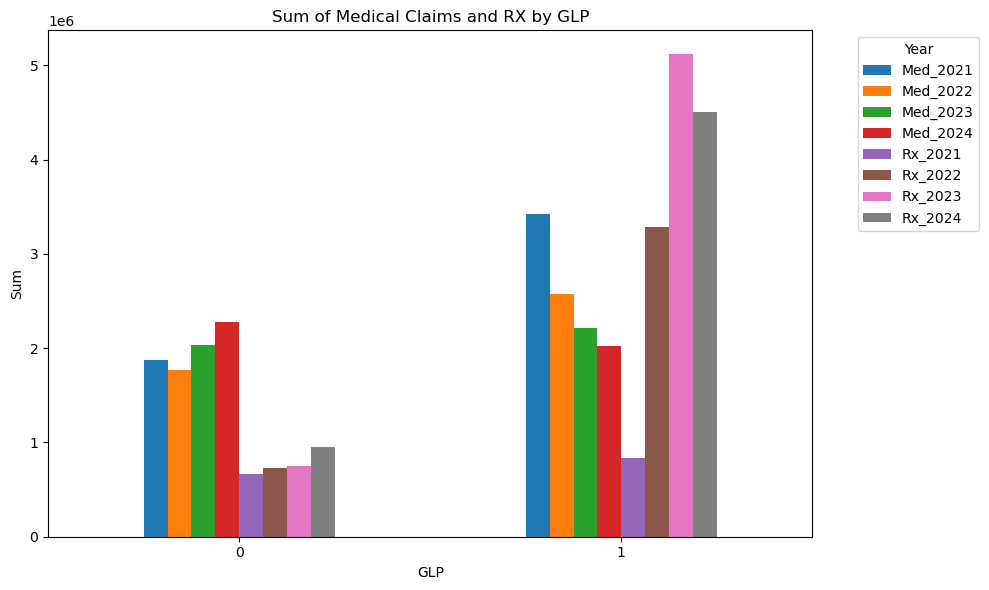

In [30]:
# Calculate sums for GLP == 1 and GLP == 0
sums = matched_members_study.groupby('GLP-1')[['Med_2021', 'Med_2022', 'Med_2023', 'Med_2024', 
                                               'Rx_2021', 'Rx_2022', 'Rx_2023', 'Rx_2024']].sum()

# Plotting
sums.plot(kind='bar', figsize=(10, 6))
plt.title('Sum of Medical Claims and RX by GLP')
plt.xlabel('GLP')
plt.ylabel('Sum')
plt.xticks(rotation=0)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Identify control group so these can be exported and read back into the No Wegovy Members notebook to filter for rx and medical claims.

In [31]:
controlled_members = controlled[['MEMBER_ID']]
controlled_members

,MEMBER_ID
261,mma-036ffc20ff794595a44950a4729f66d3
264,mma-ca2e959e4c094ddab3a345d0d94d2f3e
265,mma-ed99a4f01306482caec74ec3d315501c
266,mma-b65786b24666471bb34a35f338d78efc
268,mma-5c6f80aabb5140e3ad2916c50cfd7cd6
...,...
1504,mma-a9532facc59f46cea6136cbd96973f0e
1547,mma-0b57ccda483b499ab5e8617f0b032cfc
1790,mma-4a037934af894450b235f6dcaeb2000a
3300,mma-fad37e4ec5734b2f9b20294eb5838eab


In [32]:
controlled_members.to_csv('matched_pairs_controlled_members_pdc_nofilter.csv', index=False)